In [249]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import scipy
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
import joblib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


In [250]:

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [251]:
df = pd.read_csv("/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/data/df_after_binding_cores.csv",index_col=0)
path_to_epitope_file = "/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/data/MHCII/epitope_data_MHCII.csv"
epitope_raw_df = pd.read_csv(path_to_epitope_file,skiprows=1)
epitope_raw_df = epitope_raw_df[epitope_raw_df["Epitope ID"].isin(df["Epitope ID"])]
epitope_raw_df

,Epitope ID,Object Type,Description,Epitope Modified Residue(s),Epitope Modification(s),Starting Position,Ending Position,Non-peptidic epitope Accession,Epitope Synonyms,Antigen Name,...,Object Type.1,Description.1,Starting Position.1,Ending Position.1,Non-peptidic object Accession,Synonyms,Antigen Name.1,Parent Protein.1,Organism Name.1,Parent Organism.1
4,39,Linear peptide,AAAIFMTATPPGTAD,NaN,NaN,1783.0,1797.0,NaN,NaN,polyprotein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,187,Linear peptide,AAGTAAQAAVVRFQE,NaN,NaN,46.0,60.0,NaN,NaN,type VII secretion protein EsxB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,505,Linear peptide,AAVVRFQEAANKQKQ,NaN,NaN,53.0,67.0,NaN,NaN,type VII secretion protein EsxB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,655,Linear peptide,ADEEQQQALSSQMGF,NaN,NaN,86.0,100.0,NaN,NaN,type VII secretion protein EsxB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,965,Linear peptide,AEHQAIIRDVLTASD,NaN,NaN,26.0,40.0,NaN,NaN,PUTATIVE ESAT-6 LIKE PROTEIN ESXL (ESAT-6 LIKE...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45433,1347302,Linear peptide,PDGFRLSWTADEGVF,NaN,NaN,1633.0,1647.0,NaN,NaN,Tenascin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45439,1347315,Linear peptide,QGQYELRVDLRDHGE,NaN,NaN,2067.0,2081.0,NaN,NaN,Tenascin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45445,1347560,Linear peptide,VESFRITYVPITGGT,NaN,NaN,1737.0,1751.0,NaN,NaN,Tenascin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45448,1347593,Linear peptide,VSLISRRGDMSSNPA,NaN,NaN,871.0,885.0,NaN,NaN,Tenascin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
epitope_raw_df["Organism Name"]

4                     Dengue virus type 3
26             Mycobacterium tuberculosis
91             Mycobacterium tuberculosis
122            Mycobacterium tuberculosis
163      Mycobacterium tuberculosis H37Rv
                       ...               
45433                        Homo sapiens
45439                        Homo sapiens
45445                        Homo sapiens
45448                        Homo sapiens
45456                        Homo sapiens
Name: Organism Name, Length: 2484, dtype: object

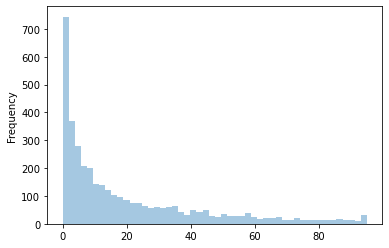

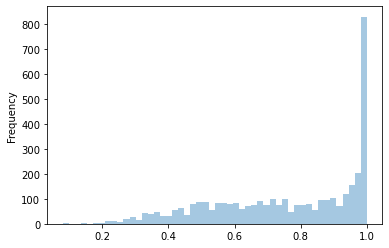

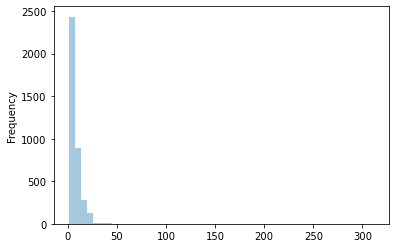

In [253]:
df["rank_score"].plot.hist(alpha=0.4,bins=50)
plt.show()
df["core_rel"].plot.hist(alpha=0.4,bins=50)
plt.show()
df["Tested Subjects"].plot.hist(alpha=0.4,bins=50)
plt.show()


In [254]:

df

,Epitope ID,Peptide,MHCs,Tested Subjects,Positive subjects,immunogenecity,core,core_rel,rank_score
0,45670,NREGKVVGLYGNGVV,DRB1_1501,1.0,1.0,1,VVGLYGNGV,0.527,2.74
1,21420,GNEWITDFVGKTVWF,DRB1_1501,1.0,1.0,1,ITDFVGKTV,1.000,1.34
2,49767,PTRVVAAEMEEAMKG,DRB1_1501,1.0,1.0,1,VVAAEMEEA,0.760,35.85
3,45669,NREGKIVGLYGNGVV,DRB1_1501,1.0,1.0,1,IVGLYGNGV,0.820,1.45
4,8911,DKKGKVVGLYGNGVV,DRB1_1501,1.0,1.0,1,VVGLYGNGV,0.593,2.41
...,...,...,...,...,...,...,...,...,...
3751,1347593,VSLISRRGDMSSNPA,DRB1_0401,7.0,0.0,0,ISRRGDMSS,0.627,41.81
3752,1347315,QGQYELRVDLRDHGE,DRB1_0401,7.0,2.0,1,YELRVDLRD,0.867,7.32
3753,1347302,PDGFRLSWTADEGVF,DRB1_0401,7.0,2.0,1,FRLSWTADE,0.993,4.75
3754,1347560,VESFRITYVPITGGT,DRB1_0401,7.0,3.0,1,FRITYVPIT,0.947,1.80


['DRB1_0101', 'DRB3_0202', 'DRB1_0701', 'DRB1_0401', 'DRB1_1101', 'DRB4_0101', 'DRB5_0101', 'DRB1_1501', 'DRB1_0407', 'DRB1_0301', 'DRB1_0403', 'DRB1_1301', 'DQA10301-DQB10302', 'DRB1_0901', 'DRB1_1406', 'DQA10102-DQB10602', 'DRB1_1402', 'DRB1_0802', 'DQA10501-DQB10201', 'DQA10101-DQB10501']


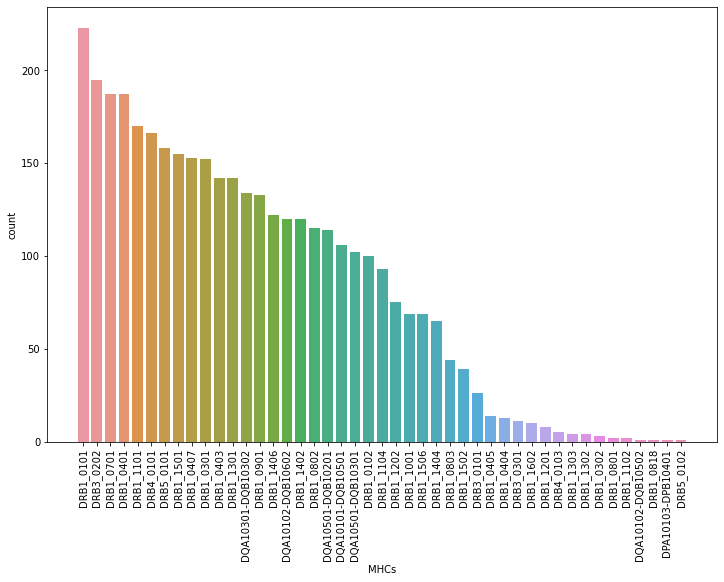

In [309]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=df,x=df["MHCs"],order = df['MHCs'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()
MHCs_of_interest = list(df['MHCs'].value_counts()[:20].index)
print(MHCs_of_interest)

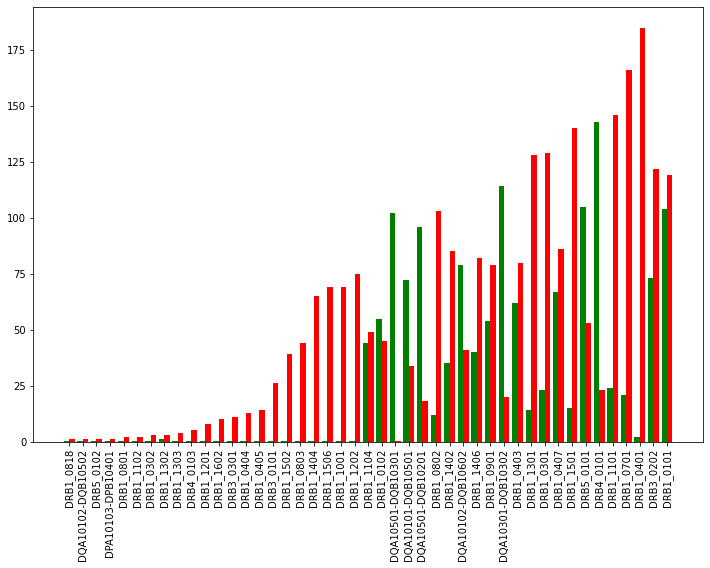

In [255]:
fig = plt.figure(figsize=(12,8))
unique_HLA = sorted(set(df["MHCs"]),key=lambda x:np.sum(df["MHCs"] == x))
immunogenecity_balance_MHC = dict()
for i,HLA in enumerate(unique_HLA):
    sub_sample = df[df["MHCs"] == HLA]["immunogenecity"]
    zero_counts = (sub_sample == 0).sum()
    one_counts = (sub_sample == 1).sum()
    immunogenecity_balance_MHC[HLA] = one_counts/(zero_counts+one_counts)
    if zero_counts == 0:
        zero_counts+=0.1
    if one_counts == 0:
        one_counts+=0.1
    plt.bar(i-0.2,zero_counts,color="green",width=0.4)
    plt.bar(i+0.2,one_counts,color="red",width=0.4)

plt.xticks(np.arange(len(unique_HLA)),unique_HLA,rotation=90)
plt.show()

In [256]:
organism_data_pr_HLA = dict()
for i,HLA in enumerate(unique_HLA):
    sub_sample = df[df["MHCs"] == HLA]
    organism_data_pr_HLA[HLA] = dict()
    for index, peptide_row in sub_sample.iterrows():
        epitope_ID = peptide_row["Epitope ID"]
        peptide_data = epitope_raw_df[epitope_raw_df["Epitope ID"] == epitope_ID]
        assert len(peptide_data) == 1, "Epitope ID not unique"
        organism = peptide_data["Organism Name"].values[0]
        antigen_name = peptide_data["Antigen Name"].values[0]
        if organism not in organism_data_pr_HLA[HLA].keys():
            organism_data_pr_HLA[HLA][organism] = 1
        else:
            organism_data_pr_HLA[HLA][organism] += 1
    


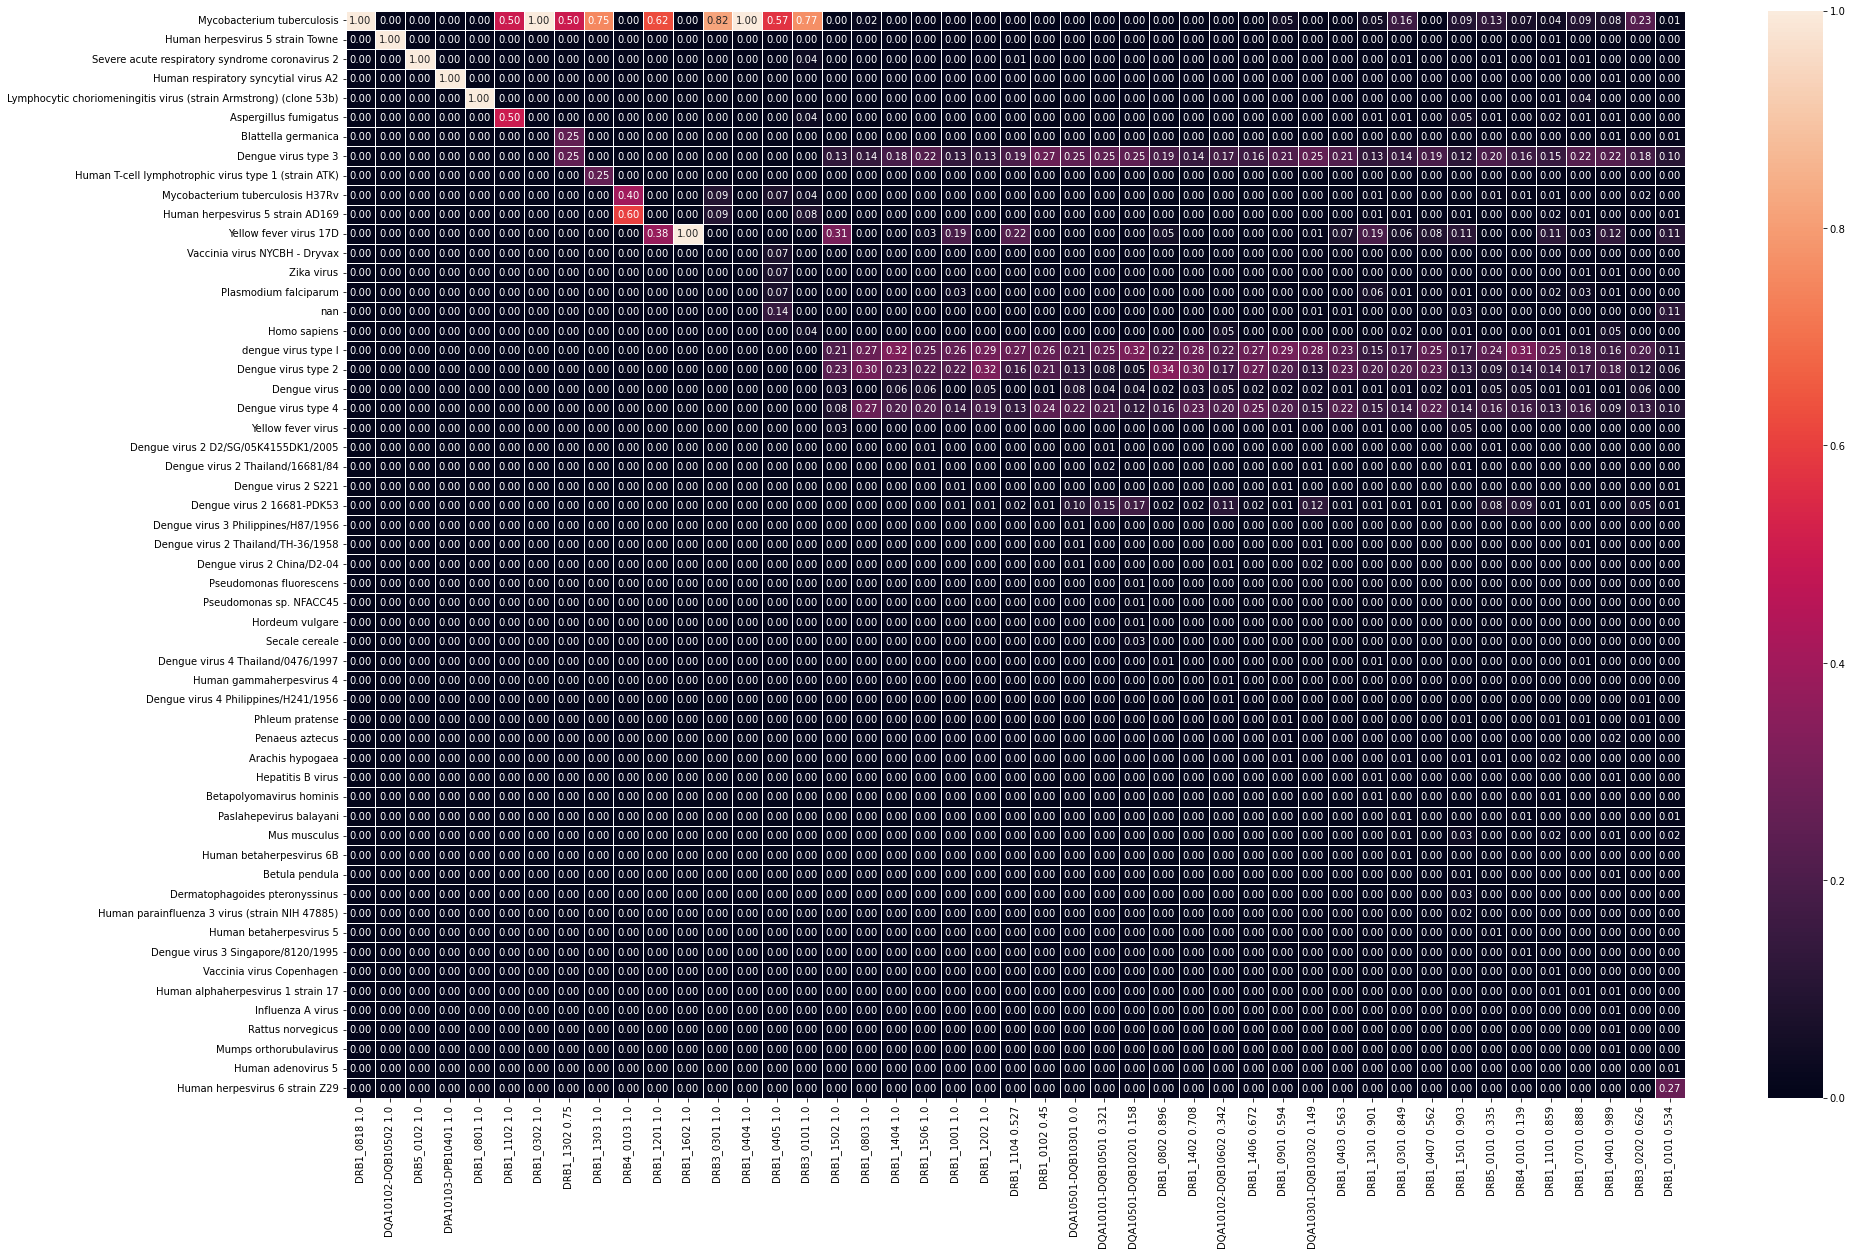

In [257]:
organism_data_df = pd.DataFrame.from_dict(organism_data_pr_HLA).T
organism_data_df = organism_data_df.div(organism_data_df.sum(axis=1), axis=0)
organism_data_df.index = [x + " " + str(round(immunogenecity_balance_MHC[x],3)) for x in organism_data_df.index]
organism_data_df = organism_data_df.fillna(0)
fig, ax = plt.subplots(figsize=(30,20))        
sns.heatmap(organism_data_df.T,linewidths=.5,annot=True, fmt=".2f")
plt.show()

In [258]:
df.loc[:,"Organism"] = [epitope_raw_df[epitope_raw_df["Epitope ID"] == ID]["Organism Name"].values[0] for ID in df["Epitope ID"]]
df.loc[:,"Antigen"] = [epitope_raw_df[epitope_raw_df["Epitope ID"] == ID]["Antigen Name"].values[0] for ID in df["Epitope ID"]]

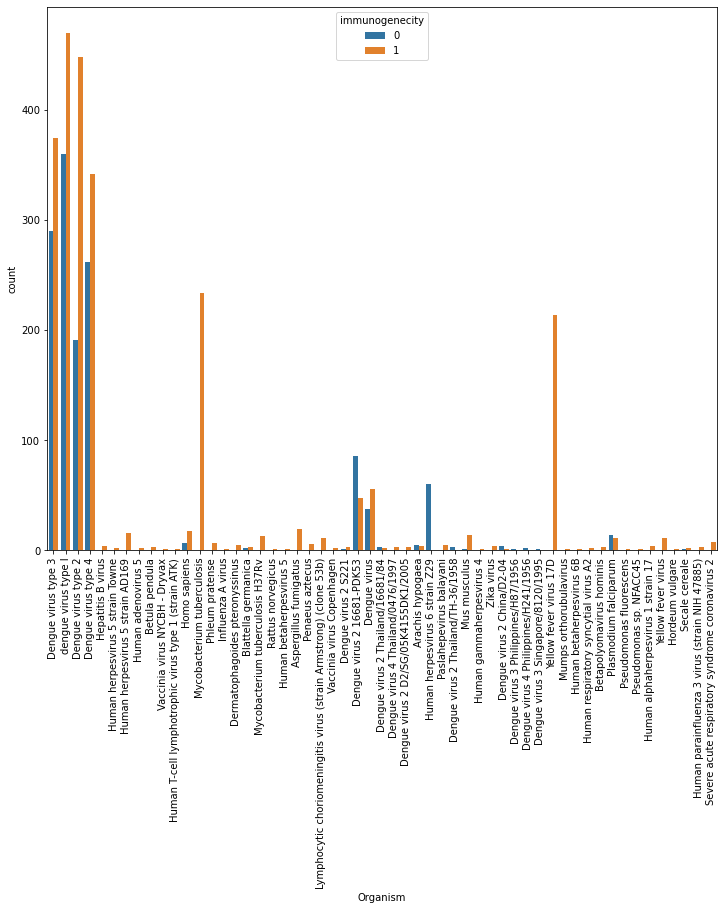

In [259]:
fig = plt.figure(figsize=(12,10))
sns.countplot(data=df, x="Organism", hue="immunogenecity")
plt.xticks(rotation=90)
plt.show()

In [260]:
df[df["Organism"] == "dengue virus type I"]

,Epitope ID,Peptide,MHCs,Tested Subjects,Positive subjects,immunogenecity,core,core_rel,rank_score,Organism,Antigen
3,45669,NREGKIVGLYGNGVV,DRB1_1501,1.0,1.0,1,IVGLYGNGV,0.820,1.45,dengue virus type I,nonstructural protein 3
6,23327,GYDWITGFPGKTVWF,DRB1_1501,1.0,1.0,1,ITGFPGKTV,1.000,0.78,dengue virus type I,polyprotein [Dengue virus type 1]
9,49768,PTRVVASEMAEALKG,DRB1_1501,1.0,1.0,1,VASEMAEAL,0.767,14.71,dengue virus type I,nonstructural protein 3
120,539022,AAAIFMTATPPGSVE,DRB1_0403,12.0,2.0,1,IFMTATPPG,0.980,0.46,dengue virus type I,"polyprotein, partial"
124,539027,AAIFMTATPPGSVEA,DRB1_1001,7.0,1.0,1,FMTATPPGS,0.940,0.69,dengue virus type I,polyprotein
...,...,...,...,...,...,...,...,...,...,...,...
3481,196043,VVRPPFNMLKRERNR,DRB1_1101,1.0,1.0,1,FNMLKRERN,1.000,0.07,dengue virus type I,polyprotein [Dengue virus 1]
3482,196043,GGFRIVNMLKRGVAR,DRB1_1101,1.0,1.0,1,VNMLKRGVA,0.680,0.67,dengue virus type I,polyprotein [Dengue virus 1]
3483,196043,GKTLGVNMVRRGVRS,DRB1_1101,1.0,1.0,1,VNMVRRGVR,0.440,8.03,dengue virus type I,polyprotein [Dengue virus 1]
3484,196043,GKNRAINMLKRGLPR,DRB1_1101,1.0,1.0,1,INMLKRGLP,1.000,0.72,dengue virus type I,polyprotein [Dengue virus 1]


## Encoding peptides and evaluating immunogenicity

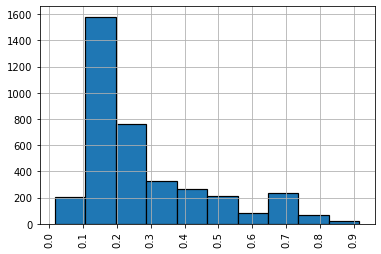

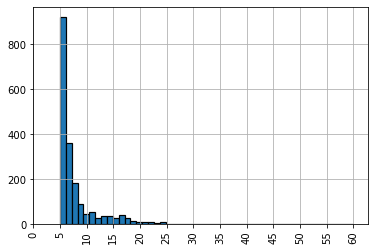

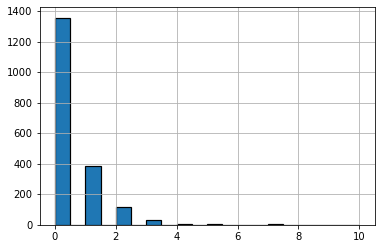

In [261]:
from scipy.stats import betabinom
def calculate_beta_binom(row):
    a0 = 1
    b0 = 1
    a = 1 + row["Positive subjects"]
    b =  1 + row["Tested Subjects"] - row["Positive subjects"]
    return betabinom.mean(1,a,b)

df.loc[:,"beta"] = [calculate_beta_binom(row) for index, row in df.iterrows()]
plt.hist(df["beta"],edgecolor='black', linewidth=1.2)
plt.xticks(np.arange(0,1,0.1),[round(x,1) for x in np.arange(0,1,0.1)],rotation=90)
plt.grid(True)
plt.show()

plt.hist(df[df["beta"] <= 0.2]["Tested Subjects"]-df[df["beta"] <= 0.2]["Positive subjects"],edgecolor='black', linewidth=1.2,bins=50)
plt.xticks(np.arange(0,65,5),[round(x,1) for x in np.arange(0,65,5)],rotation=90)
plt.grid(True)
plt.show()

plt.hist(df[df["beta"] <= 0.2]["Positive subjects"],edgecolor='black', linewidth=1.2,bins=20)
plt.grid(True)
plt.show()

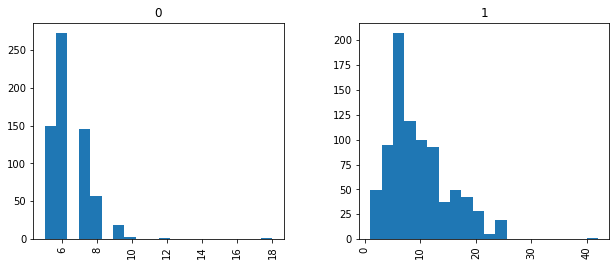

In [262]:
test_df = df[(df["Organism"].isin(["Dengue virus type 3","dengue virus type I"]))] #& (df["Tested Subjects"] > 10)
# test_df = df[(df["MHCs"].isin(["DRB1_0101"]))] #& (df["Tested Subjects"] > 10)
test_df['Tested Subjects'].hist(by=test_df['immunogenecity'],figsize=(10,4),bins=20)
plt.show()

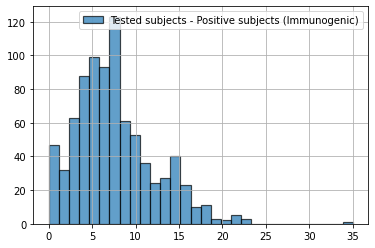

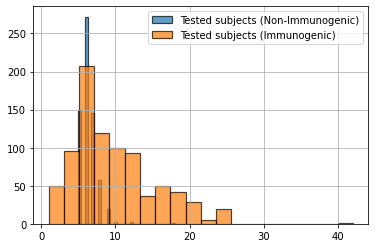

In [263]:
np.unique(test_df["Tested Subjects"] - test_df["Positive subjects"],return_counts=True)
plt.hist(test_df[test_df["immunogenecity"] == 1]["Tested Subjects"] - test_df[test_df["immunogenecity"] == 1]["Positive subjects"],bins=30,edgecolor='black', linewidth=1.2,alpha=0.7,label="Tested subjects - Positive subjects (Immunogenic)")
plt.grid(True)
plt.legend()
plt.show()
plt.hist(test_df[test_df["immunogenecity"] == 0]["Tested Subjects"],bins=30,edgecolor='black', linewidth=1.2,alpha=0.7,label="Tested subjects (Non-Immunogenic)")
plt.hist(test_df[test_df["immunogenecity"] == 1]["Tested Subjects"],bins=20,edgecolor='black', linewidth=1.2,alpha=0.7,label="Tested subjects (Immunogenic)")
plt.grid(True)
plt.legend()
plt.show()

## Encoding the peptides using AAindex and the annotated cores

In [264]:
def encode_peptide_aaindex(aa_seq,aaindex_PCA):
    """Enocding an aa-seqquence using the AAindex encoding scheme.

    Args:
        aa_seq (str): The aa-sequence we want to encode
        aaindex_PCA (pd.DataFrame):  A pandas dataframe which holds the AAindex encoding scheme

    Returns:
        np.array: The encoded peptide sequence
    """

    aa_seq = list(aa_seq.upper())
    encoded_aa_seq = []
    PCs = aaindex_PCA.shape[1]
    for aa in aa_seq:
        if aa == "X" or aa == "-":
            encoded_aa_seq.append(np.array([0 for x in range(PCs)]))
        else:
            try:
                encoded_aa_seq.append(aaindex_PCA.loc[aa].to_numpy())
            except KeyError:
                print("Encoding error")
                sys.exit(1)
    return np.array(encoded_aa_seq)

def add_binding_core_annotataions(peptide,core):
    core_start = peptide.find(core)
    core_indexes = list(range(core_start,core_start + len(core)))
    indexes = np.array([0 if i not in core_indexes else 1 for i in range(len(peptide))])
    indexes = indexes.reshape(-1,1)
    return np.array(indexes)

aaindex_PCA = pd.read_csv('../data/PCA_repr_aa.csv',index_col=0)
aaindex_PCA = (aaindex_PCA - aaindex_PCA.mean()) / aaindex_PCA.std()



In [265]:
aaindex_encoding = encode_peptide_aaindex("GNEWITDFVGKTVWF",aaindex_PCA)
core_encoding = add_binding_core_annotataions("GNEWITDFVGKTVWF","ITDFVGKTV")


In [266]:
X = []
labels = []
for index, peptide in test_df.iterrows():
    aaindex_encoding = encode_peptide_aaindex(peptide["Peptide"],aaindex_PCA)
    core_encoding = add_binding_core_annotataions(peptide["Peptide"],peptide["core"])
    total_encoding = np.concatenate((core_encoding,aaindex_encoding),axis=1)
    X.append(total_encoding)
    # labels.append(peptide["immunogenecity"])
    labels.append(peptide["beta"])

X = np.array(X)
X = X.reshape(X.shape[0],-1)
labels = np.array(labels)


## PCA analysis of encoded pepetides

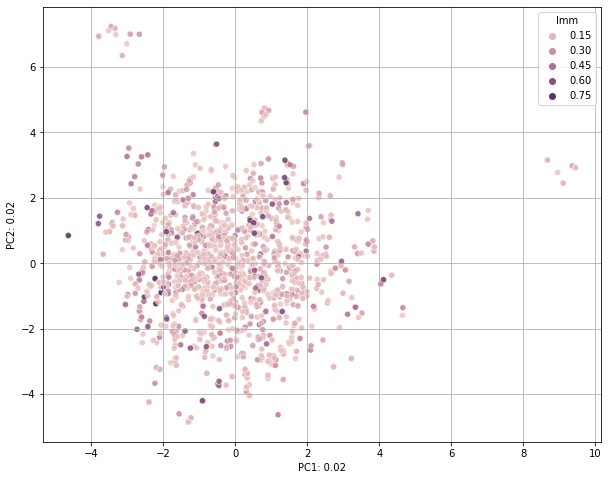

In [267]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf["Imm"] = labels
fig,axs = plt.subplots(figsize=(10,8))
sns.scatterplot(data=principalDf,x="PC1",y="PC2",hue="Imm",alpha=0.8)
# confidence_ellipse(principalDf[principalDf["Imm"] == 1]["PC1"].to_numpy(), principalDf[principalDf["Imm"] == 1]["PC2"].to_numpy(), axs, edgecolor='orange')
# confidence_ellipse(principalDf[principalDf["Imm"] == 0]["PC1"].to_numpy(), principalDf[principalDf["Imm"] == 0]["PC2"].to_numpy(), axs, edgecolor='blue')

axs.set_xlabel(f"PC1: {pca.explained_variance_ratio_[0]:.2f}")
axs.set_ylabel(f"PC2: {pca.explained_variance_ratio_[1]:.2f}")
plt.grid(True)
plt.show()

## MDS analysis of encoded peptides

In [268]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
dist_mat = dist.pairwise(X)


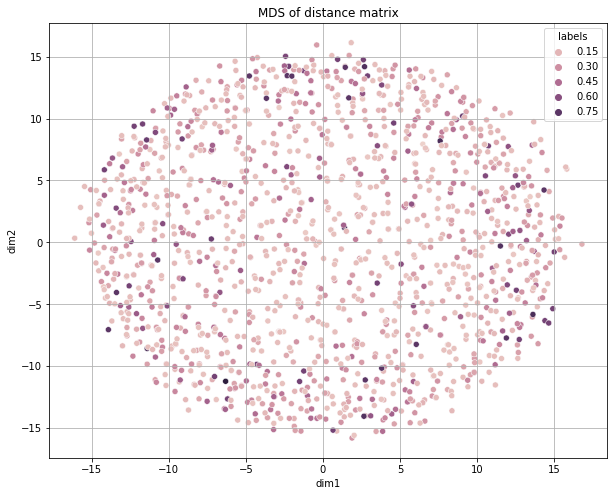

In [269]:

def MDS_analysis(X,labels):
    from sklearn.manifold import MDS
    distance_matrix = X
    mds = MDS(random_state=0,dissimilarity='precomputed',metric=True)
    MDS_transform = mds.fit_transform(distance_matrix)
    MDS_transform = MDS_transform + np.random.normal(0,0.01,MDS_transform.shape)
    
    principalDf = pd.DataFrame(data = MDS_transform
             , columns = ['dim1', 'dim2'])
    principalDf["labels"] = [x if str(x) != "nan" else "nan" for x in labels]

    fig,axs = plt.subplots(figsize=(10,8))
    sns.scatterplot(data=principalDf, x = principalDf.dim1, y= principalDf.dim2, hue = "labels") # ,style="labels"
    axs.set_xlabel(f"dim1")
    axs.set_ylabel(f"dim2")

    # confidence_ellipse(principalDf[principalDf["labels"] == "1"]["dim1"].to_numpy(), principalDf[principalDf["labels"] == "1"]["dim2"].to_numpy(), axs, edgecolor='blue')
    # confidence_ellipse(principalDf[principalDf["labels"] == "0"]["dim1"].to_numpy(), principalDf[principalDf["labels"] == "0"]["dim2"].to_numpy(), axs, edgecolor='orange')

    
    #get handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    labels_to_handles = {label:handel for handel,label in zip(handles, labels)}

    # if "nan" in labels_to_handles.keys():
    #     sorted_labels = sorted([x for x in labels_to_handles.keys() if x != "nan"],key=lambda x: int(x)) + ["nan"]
    #     sorted_handles = [labels_to_handles[x] for x in sorted_labels] + [labels_to_handles["nan"]]

    # else:
    #     sorted_labels = sorted(labels_to_handles.keys(),key=lambda x: int(x))
    #     sorted_handles = [labels_to_handles[x] for x in sorted_labels]

    # plt.legend(sorted_handles,sorted_labels,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.title("MDS of distance matrix")
    plt.show()

MDS_analysis(dist_mat,labels)

In [270]:
fasta_file = open("../data/MHCII_peptides.fasta","w+")
for index, peptide in df.iterrows():
    print(">" + str(peptide["Epitope ID"]),file=fasta_file)
    print(peptide.Peptide,file=fasta_file)
fasta_file.close()

-0.18384097188141382 8.006416923713277e-13


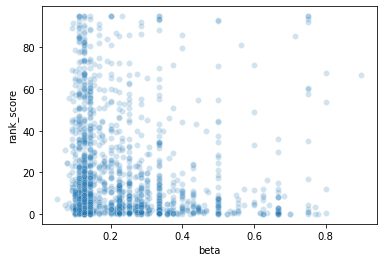

In [271]:
sns.scatterplot(data=test_df,x="beta",y="rank_score",alpha=0.2)
coeff, p_value = scipy.stats.spearmanr(test_df["rank_score"],test_df["beta"])
print(coeff,p_value)
plt.show()

In [88]:
def make_blast():
    make_blast_db_cmd = "/Users/christianpederjacobsen/tools/ncbi-blast-2.12.0+/bin/makeblastdb -in /Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/swissprot_db/uniprot-compressed_true_download_true_format_fasta_query__28_2A_29_2-2022.09.14-16.10.46.03.fasta -dbtype prot -out ../blast_databases/"
    os.system(make_blast_db_cmd)

make_blast()



Building a new DB, current time: 09/19/2022 14:56:35
New DB name:   /Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/blast_databases
New DB title:  /Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/swissprot_db/uniprot-compressed_true_download_true_format_fasta_query__28_2A_29_2-2022.09.14-16.10.46.03.fasta
Sequence type: Protein
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 568002 sequences in 14.4681 seconds.




In [89]:
def blast_results(query,blast_db,outfile,threads):
    blast_command = f"/Users/christianpederjacobsen/tools/ncbi-blast-2.12.0+/bin/blastp -db {blast_db}/blast_databases -num_threads {threads} -query \"{query}\" -outfmt \"6 qseqid sseqid pident evalue bitscore\" > {outfile}"
    os.system(blast_command)

In [90]:
blast_db = "/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/blast_databases"
query = "/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/data/MHCII_peptides.fasta"
outfile = "../data/blast_results.results"
blast_results(query,blast_db,outfile,4)

In [272]:
def read_blast_results(path_to_blast_results,p_value_threshold):
    results = dict()
    with open(path_to_blast_results,"r") as infile:
        for line in infile:
            line = line.split()
            peptide_id,hit_id,percentage_identity,p_value,blast_score = line
            if float(p_value) <= p_value_threshold:
                if peptide_id not in results.keys():
                    results[peptide_id] = [hit_id]
                else:
                    results[peptide_id].append(hit_id)
    return results




In [273]:
blast_results = read_blast_results(outfile,0.05)

In [274]:
blast_results_count_dict = {peptide:len(blast_results[peptide]) for peptide in blast_results.keys()}

In [275]:
df.loc[:,"Count"] = np.log10([blast_results_count_dict[str(row["Epitope ID"])] + 1 if str(row["Epitope ID"]) in blast_results_count_dict.keys() else 1 for index,row in df.iterrows()])

In [276]:
df["Count"]

0       1.176091
1       1.322219
2       0.778151
3       1.176091
4       1.146128
          ...   
3751    0.477121
3752    0.698970
3753    0.698970
3754    0.602060
3755    0.301030
Name: Count, Length: 3756, dtype: float64

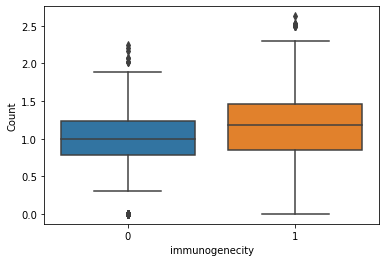

In [277]:
sns.boxplot(data=df,x="immunogenecity",y="Count")
plt.show()

0.18455732162043967 3.9405848148751725e-30


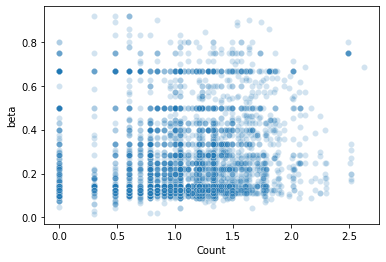

In [286]:
sns.scatterplot(data=df,x="Count",y="beta",alpha=0.2)
coeff, p_value = scipy.stats.spearmanr(df["Count"],df["beta"])
print(coeff,p_value)
plt.show()

## Regression classfication of beta-scores

In [289]:

X = []
y = []
for index, peptide in df.iterrows():
    aaindex_encoding_peptide = encode_peptide_aaindex(peptide["Peptide"],aaindex_PCA)
    core_encoding = add_binding_core_annotataions(peptide["Peptide"],peptide["core"])
    total_encoding = np.concatenate((core_encoding,aaindex_encoding_peptide),axis=1)
    X.append(total_encoding)
    y.append(peptide["beta"])

X = np.array(X)
X = X.reshape(X.shape[0],-1)
y = np.array(y)

100%|██████████| 20/20 [03:59<00:00, 11.98s/it]


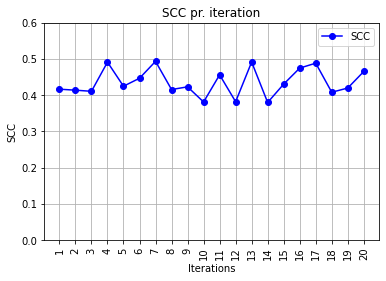

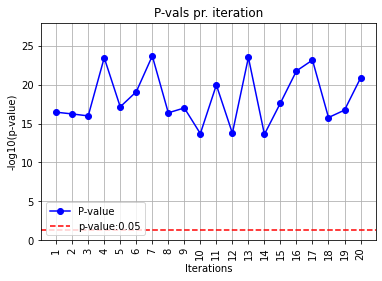

In [290]:
SCCs = []
pvals = []
N_models = 20
N_estimators = 100
for N in tqdm(range(N_models),total=N_models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=N)
    regressor = RandomForestRegressor(n_estimators = N_estimators, random_state=0)
    regressor.fit(X_train,y_train)
    joblib.dump(regressor, f"../MHCII/models/RandomForestRegressor_{N_estimators}_estimators_{N}.joblib")
    # regressor = joblib.load(f"../MHCII/models/RandomForestRegressor_{N_estimators}_estimators_{N}.joblib")
    y_pred = regressor.predict(X_test)
    mse = ((y_pred - y_test)**2).mean(axis=0)
    coeff, p_value = scipy.stats.spearmanr(y_pred, y_test)
    SCCs.append(coeff)
    pvals.append(p_value)
    if "e" in str(p_value):
        pre,power = str(p_value).split("e-")
        p_value = f"{pre[:3]}e-{power}"
    # plt.title("SCC:" + str(round(coeff,2)) + f" P-value: {p_value}")
    # plt.plot(y_pred,y_test,ls="",marker="o",color="blue",alpha=0.2)
    # plt.xlabel("Prediction")
    # plt.ylabel("Actual")
    # plt.grid(True)
    # plt.show()

plt.title("SCC pr. iteration")
plt.plot(range(len(SCCs)),SCCs,marker="o",color="blue",label="SCC")
plt.ylim(0,0.6)
plt.grid(True)
plt.xlabel("Iterations")
plt.ylabel("SCC")
plt.xticks(np.arange(0,N_models ,1),np.arange(1,N_models + 1 ,1),rotation=90)
plt.legend()
plt.show()

plt.title("P-vals pr. iteration")
plt.plot(range(len(pvals)),-np.log10(pvals),marker="o",color="blue",label="P-value")
plt.ylim(0,28)
plt.axhline(-np.log10(0.05),color="r",ls="--",label="p-value:0.05")
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0,N_models ,1),np.arange(1,N_models + 1 ,1),rotation=90)
plt.xlabel("Iterations")
plt.ylabel("-log10(p-value)")
plt.show()



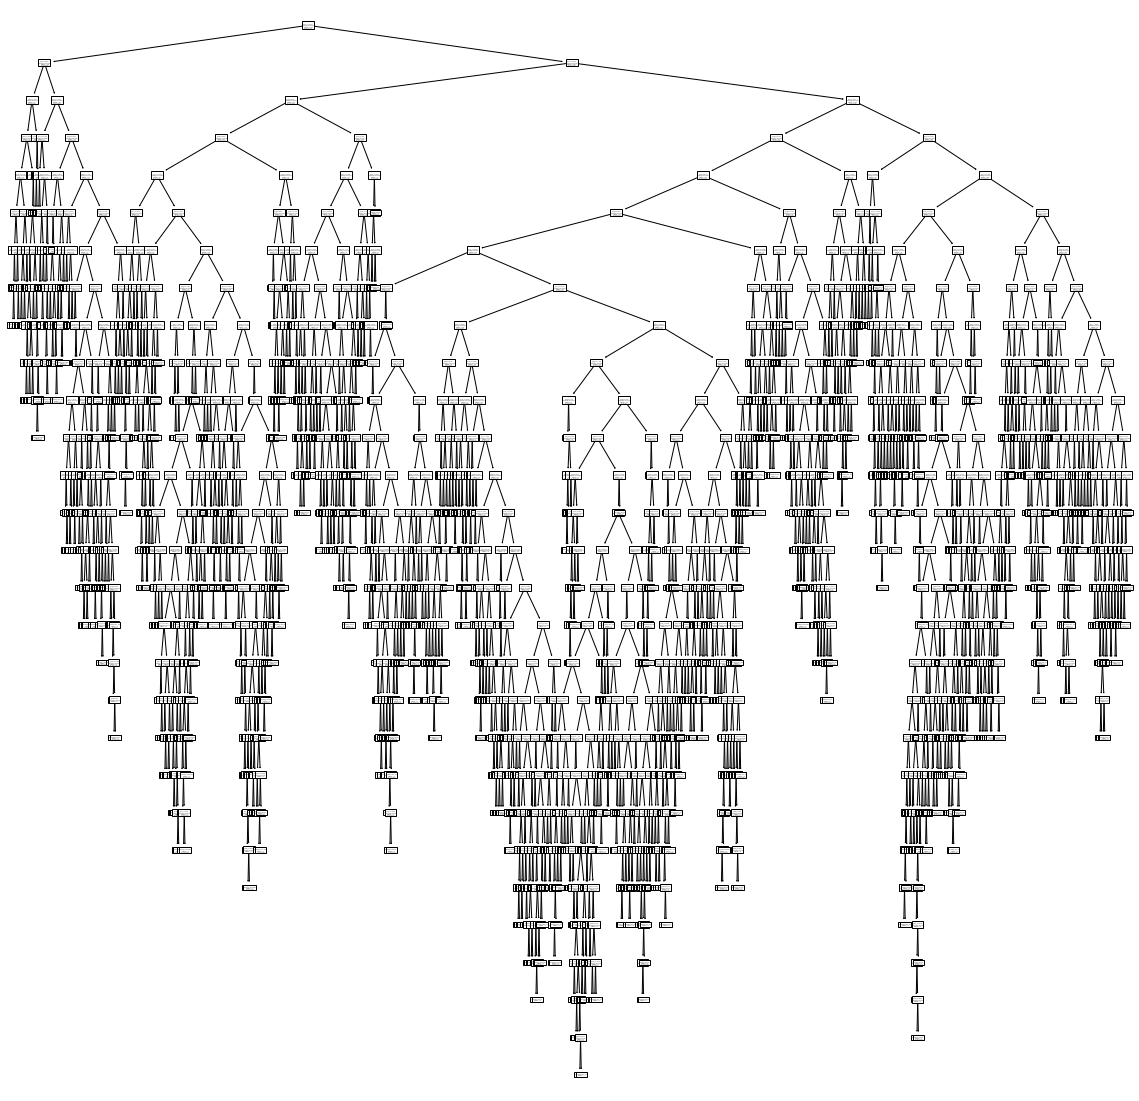

In [240]:
fig = plt.figure(figsize=(20,20))
plot_tree(regressor.estimators_[0])
plt.show()

In [ ]:
df